# 載入所需套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 定義函數

# 單因子

In [2]:
def stock_risk(beta,market_vol,idio_vol):
    common_risk=(beta**2)*(market_vol**2)
    specific_risk=idio_vol**2
    total_risk=common_risk+specific_risk
    common_risk_ratio=common_risk/total_risk
    
    return total_risk,common_risk_ratio

# 二因子

In [3]:
def two_stocks_one_factor(w1,w2,b1,b2,market_vol,idio_vol_1,idio_vol_2):
    common_risk=(market_vol**2)*((w1**2)*(b1**2)+(w2**2)*(b2**2)+2*w1*w2*b1*b2)
    specific_risk=(w1**2)*(idio_vol_1**2)+(w2**2)*(idio_vol_2**2)
    total_risk=common_risk+specific_risk
    common_risk_ratio=common_risk/total_risk
    
    return total_risk,common_risk_ratio

# 多因子

In [4]:
def multi_stocks_one_factor(w_vector,beta_vector,market_vol,idio_vol_matrix):
    common_risk=(w_vector.dot(beta_vector))*market_vol*(beta_vector.dot(w_vector))
    specific_risk=w_vector.dot(idio_vol_matrix).dot(w_vector)
    total_risk=common_risk+specific_risk
    common_risk_ratio=common_risk/total_risk
    
    return total_risk,common_risk_ratio

# 多因子(固定投資比例和因子總風險)

In [5]:
def portfolio_risk_decomposition(budget=0.2,corr=1,algo_count=2,algo_total_risk=0.04):
    N=algo_count
    
    algo_common_risk=budget*(algo_total_risk**2)
    algo_idio_risk=algo_total_risk**2-algo_common_risk

    w=1/N
    
    cov=corr*algo_common_risk
    common_risk=N*(w**2)*algo_common_risk+(N**2-N)*(w**2)*cov
    idio_risk=N*(w**2)*algo_idio_risk
    total_risk=common_risk+idio_risk
    common_risk_ratio=common_risk/total_risk
    
    return total_risk,common_risk_ratio

# 呼叫函數

# 單因子

In [6]:
#Betas
b1=1.2
b2=1.1
#Market volatility
market_vol=0.15
#Idiosyncratic volatilities
idio_vol_1=0.10 
idio_vol_2=0.07

total_1,ratio_1=stock_risk(b1,market_vol,idio_vol_1)
total_2,ratio_2=stock_risk(b2,market_vol,idio_vol_2)

print('Stock 1 risk (annualized standard deviation): {:6.4f}'.format(np.sqrt(total_1)))
print('Stock 1 percent of total risk due to common risk: {:6.4f}'.format(ratio_1))
print('Stock 2 risk (annualized standard deviation): {:6.4f}'.format(np.sqrt(total_2)))
print('Stock 2 percent of total risk due to common risk: {:6.4f}'.format(ratio_2))

Stock 1 risk (annualized standard deviation): 0.2059
Stock 1 percent of total risk due to common risk: 0.7642
Stock 2 risk (annualized standard deviation): 0.1792
Stock 2 percent of total risk due to common risk: 0.8475


# 二因子

In [7]:
#Weights
w1=0.5
w2=0.5
#Betas
b1=1.2
b2=1.1
#Market volatility
market_vol=0.15
#Idiosyncratic volatilities
idio_vol_1=0.10 
idio_vol_2=0.07

total,ratio=two_stocks_one_factor(w1,w2,b1,b2,market_vol,idio_vol_1,idio_vol_2)

print('Portfolio risk (annualized standard deviation): {:6.4f}'.format(np.sqrt(total)))
print('Percent of total risk due to common risk: {:6.4f}'.format(ratio))

Portfolio risk (annualized standard deviation): 0.1830
Percent of total risk due to common risk: 0.8887


In [8]:
#Zero beta portfolio
w1=0.5
w2=-w1*b1/b2
#Betas
b1=1.2
b2=1.1
#Market volatility
market_vol=0.15
#Idiosyncratic volatilities
idio_vol_1=0.10 
idio_vol_2=0.07

total,ratio=two_stocks_one_factor(w1,w2,b1,b2,market_vol,idio_vol_1,idio_vol_2)

print('Portfolio risk (annualized standard deviation): {:6.4f}'.format(np.sqrt(total)))
print('Percent of total risk due to common risk: {:6.4f}'.format(ratio))

Portfolio risk (annualized standard deviation): 0.0629
Percent of total risk due to common risk: 0.0000


# 多因子

In [9]:
#Weights
w_vector=np.array([0.5,0.5])
#Betas
beta_vector=np.array([1.2,1.1])
#Market volatility
market_vol=0.15**2
#Idiosyncratic volatilities
idio_vol_matrix=np.diagflat([0.10**2,0.07**2])

total,ratio=multi_stocks_one_factor(w_vector,beta_vector,market_vol,idio_vol_matrix)

print('Portfolio risk (annualized standard deviation): {:6.4f}'.format(np.sqrt(total)))
print('Percent of total risk due to common risk: {:6.4f}'.format(ratio))

Portfolio risk (annualized standard deviation): 0.1830
Percent of total risk due to common risk: 0.8887


# 多因子(固定投資比例和因子總風險)

In [10]:
total,ratio=portfolio_risk_decomposition(budget=0.2,algo_count=20,corr=1,algo_total_risk=0.04)

print('Portfolio total risk: {:6.4f}'.format(np.sqrt(total)))
print('Portfolio percent of common risk: {:6.4f}'.format(ratio))

Portfolio total risk: 0.0196
Portfolio percent of common risk: 0.8333


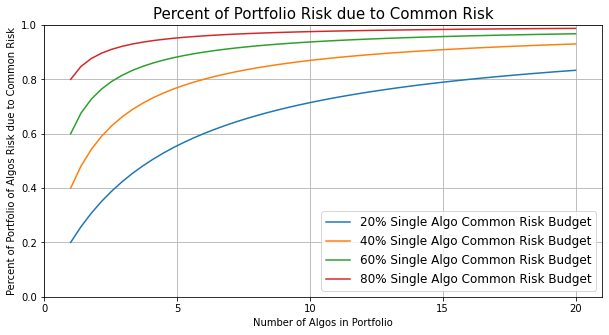

In [11]:
algos=np.linspace(1,20)

fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(algos,portfolio_risk_decomposition(budget=0.2,corr=1.0,algo_count=algos)[1],label='20% Single Algo Common Risk Budget')
ax.plot(algos,portfolio_risk_decomposition(budget=0.4,corr=1.0,algo_count=algos)[1],label='40% Single Algo Common Risk Budget')
ax.plot(algos,portfolio_risk_decomposition(budget=0.6,corr=1.0,algo_count=algos)[1],label='60% Single Algo Common Risk Budget')
ax.plot(algos,portfolio_risk_decomposition(budget=0.8,corr=1.0,algo_count=algos)[1],label='80% Single Algo Common Risk Budget')
ax.set_ylim([0,1])
ax.set_xlim([0,21])
ax.set_title('Percent of Portfolio Risk due to Common Risk',fontsize=15)
ax.set_xlabel('Number of Algos in Portfolio',fontsize=10)
ax.set_ylabel('Percent of Portfolio of Algos Risk due to Common Risk',fontsize=10)
ax.set_xticks(np.arange(0,25,5))
ax.legend(loc='lower right',fontsize=12)
ax.grid()